<a href="https://colab.research.google.com/github/menna03/FIFA-20-complete-player-dataset/blob/main/FIFA_20_complete_player_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from google.colab import drive
drive.mount('/content/drive')


In [ ]:
import pandas as pd

# Define file paths
file_paths = [
    "/content/drive/MyDrive/FIFA/players_15.csv",
    "/content/drive/MyDrive/FIFA/players_16.csv",
    "/content/drive/MyDrive/FIFA/players_17.csv",
    "/content/drive/MyDrive/FIFA/players_18.csv",
    "/content/drive/MyDrive/FIFA/players_19.csv",
    "/content/drive/MyDrive/FIFA/players_20.csv",
    "/content/drive/MyDrive/FIFA/teams_and_leagues.csv"
]


# Create a dictionary to store DataFrames
data_frames = {}

# Read each CSV file and store it in the dictionary
for file_path in file_paths:
    file_name = file_path.split('/')[-1].split('.')[0]  # Extract the file name without extension
    data_frames[file_name] = pd.read_csv(file_path)

# Access the DataFrames using keys
players_15_df = data_frames['players_15']
players_16_df = data_frames['players_16']
players_17_df = data_frames['players_17']
players_18_df = data_frames['players_18']
players_19_df = data_frames['players_19']
players_20_df = data_frames['players_20']
teams_and_leagues_df = data_frames['teams_and_leagues']


In [ ]:
players_20_df.head()

sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2     190871  https://sofifa.com/player/190871/neymar-da-sil...   
3     200389  https://sofifa.com/player/200389/jan-oblak/20/...   
4     183277  https://sofifa.com/player/183277/eden-hazard/2...   

          short_name                            long_name  age         dob  \
0           L. Messi       Lionel Andrés Messi Cuccittini   32  1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   34  1985-02-05   
2          Neymar Jr        Neymar da Silva Santos Junior   27  1992-02-05   
3           J. Oblak                            Jan Oblak   26  1993-01-07   
4          E. Hazard                          Eden Hazard   28  1991-01-07   

   height_cm  weight_kg nationality                 club  ...   lwb   ldm  \
0        170         72   Argentina         FC Barcelona  ...  68+2  66+2   
1        187         83    Portugal             Juventus  ...  65+3  61+3   
2        175         68      Brazil  Paris Saint-Germain  ...  66+3  61+3   
3        188         87    Slovenia      Atlético Madrid  ...   NaN   NaN   
4        175         74     Belgium          Real Madrid  ...  66+3  63+3   

    cdm   rdm   rwb    lb   lcb    cb   rcb    rb  
0  66+2  66+2  68+2  63+2  52+2  52+2  52+2  63+2  
1  61+3  61+3  65+3  61+3  53+3  53+3  53+3  61+3  
2  61+3  61+3  66+3  61+3  46+3  46+3  46+3  61+3  
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
4  63+3  63+3  66+3  61+3  49+3  49+3  49+3  61+3  

[5 rows x 104 columns]

In [ ]:
teams_and_leagues_df.head()

url              league_name
0  241  Spain Primera Division 
1   11  English Premier League 
2    5  English Premier League 
3  243  Spain Primera Division 
4    1  English Premier League

# Data Processing

In [ ]:
col = list(players_20_df.columns)  # To print all the columns
print(col)

['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob', 'height_cm', 'weight_kg', 'nationality', 'club', 'overall', 'potential', 'value_eur', 'wage_eur', 'player_positions', 'preferred_foot', 'international_reputation', 'weak_foot', 'skill_moves', 'work_rate', 'body_type', 'real_face', 'release_clause_eur', 'player_tags', 'team_position', 'team_jersey_number', 'loaned_from', 'joined', 'contract_valid_until', 'nation_position', 'nation_jersey_number', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning', 'player_traits', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_

In [ ]:
players_20_df.duplicated().sum()

0

In [ ]:
# Calculate the number of null values for each column
null_counts = players_20_df.isna().sum() * 100 / len(players_20_df)

# Filter columns with at least one null value
columns_with_nulls = null_counts[null_counts > 0]

# Display columns with null values
print("Columns with null values:")
print(columns_with_nulls)


Columns with null values:
release_clause_eur       7.101433
player_tags             91.798884
team_position            1.313054
team_jersey_number       1.313054
loaned_from             94.266331
joined                   7.046723
contract_valid_until     1.313054
nation_position         93.839589
nation_jersey_number    93.839589
pace                    11.139074
shooting                11.139074
passing                 11.139074
dribbling               11.139074
defending               11.139074
physic                  11.139074
gk_diving               88.860926
gk_handling             88.860926
gk_kicking              88.860926
gk_reflexes             88.860926
gk_speed                88.860926
gk_positioning          88.860926
player_traits           58.605974
ls                      11.139074
st                      11.139074
rs                      11.139074
lw                      11.139074
lf                      11.139074
cf                      11.139074
rf                    

In [ ]:
players_20_df.shape

(18278, 104)

In [ ]:
# Remove rows with any null values
players_20_df_filtered = players_20_df.dropna()

# Display the modified DataFrame
print(players_20_df_filtered.shape)


(0, 104)


In [ ]:
players_20_df.shape

(18278, 104)

In [ ]:
# Calculate the percentage of missing values for each column
col_percent_missing = players_20_df.isna().sum() * 100 / len(players_20_df)

# Drop columns with more than 59% missing values
columns_to_drop = col_percent_missing[col_percent_missing > 50].index
players_20_df = players_20_df.drop(columns=columns_to_drop)

# Display the modified DataFrame
print(players_20_df.shape)


(18278, 93)


In [ ]:
players_20_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 93 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   sofifa_id                   18278 non-null  int64  
 1   player_url                  18278 non-null  object 
 2   short_name                  18278 non-null  object 
 3   long_name                   18278 non-null  object 
 4   age                         18278 non-null  int64  
 5   dob                         18278 non-null  object 
 6   height_cm                   18278 non-null  int64  
 7   weight_kg                   18278 non-null  int64  
 8   nationality                 18278 non-null  object 
 9   club                        18278 non-null  object 
 10  overall                     18278 non-null  int64  
 11  potential                   18278 non-null  int64  
 12  value_eur                   18278 non-null  int64  
 13  wage_eur                    182

In [ ]:
# Define the list of columns to drop
useless_columns = ['dob', 'sofifa_id', 'player_url', 'long_name', 'body_type', 'real_face']

# Drop the specified columns
players_20_df = players_20_df.drop(columns=useless_columns)



In [ ]:
# Display the modified DataFrame
print(players_20_df.shape)


(18278, 87)


In [ ]:
columns = ['ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm','rm','lwb','ldm', 'cdm','rdm','rwb','lb','lcb','cb','rcb','rb']

In [ ]:
# Get the value counts of the 'club' column
club_counts = players_20_df['club'].value_counts()

# Print club and count
for club, count in club_counts.items():
    print(f"{club}: {count}")


FC Barcelona: 33
Real Valladolid CF: 33
VfL Wolfsburg: 33
Crystal Palace: 33
Eintracht Frankfurt: 33
Hertha BSC: 33
Leicester City: 33
AS Monaco: 33
SC Paderborn 07: 33
Sevilla FC: 33
Athletic Club de Bilbao: 33
Deportivo Alavés: 33
Juventus: 33
Udinese: 33
Watford: 33
Bournemouth: 33
Lecce: 33
Borussia Mönchengladbach: 33
FC Nantes: 33
Newcastle United: 33
Brighton & Hove Albion: 33
Aston Villa: 33
Norwich City: 33
Sheffield United: 33
Southampton: 33
Burnley: 33
1. FC Union Berlin: 33
Hellas Verona: 33
Fortuna Düsseldorf: 33
Parma: 33
CD Leganés: 33
FC Augsburg: 33
Everton: 33
1. FSV Mainz 05: 33
Lazio: 33
West Ham United: 33
RB Leipzig: 33
Chelsea: 33
Manchester United: 33
Tottenham Hotspur: 33
Liverpool: 33
Manchester City: 33
Arsenal: 33
Real Madrid: 33
RC Celta: 33
Valencia CF: 33
Paris Saint-Germain: 33
Atlético Madrid: 33
Wolverhampton Wanderers: 33
Villarreal CF: 32
Sampdoria: 32
Levante UD: 32
Genoa: 32
FC Girondins de Bordeaux: 32
Amiens SC: 32
AS Saint-Étienne: 32
SV Werder

In [ ]:
for col in columns:
  players_20_df[col]=players_20_df[col].str.split('+',n=1,expand = True)[0]

players_20_df[columns]

ls   st   rs   lw   lf   cf   rf   rw  lam  cam  ...  lwb  ldm  cdm  \
0       89   89   89   93   93   93   93   93   93   93  ...   68   66   66   
1       91   91   91   89   90   90   90   89   88   88  ...   65   61   61   
2       84   84   84   90   89   89   89   90   90   90  ...   66   61   61   
3      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
4       83   83   83   89   88   88   88   89   89   89  ...   66   63   63   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
18273   32   32   32   31   31   31   31   31   31   31  ...   43   42   42   
18274   33   33   33   33   32   32   32   33   33   33  ...   44   43   43   
18275   43   43   43   43   43   43   43   43   44   44  ...   47   49   49   
18276   43   43   43   45   44   44   44   45   46   46  ...   48   48   48   
18277   42   42   42   44   43   43   43   44   46   46  ...   48   49   49   

       rdm  rwb   lb  lcb   cb  rcb   rb  
0       66   68   63   52   52   52   63  
1       61   65   61   53   53   53   61  
2       61   66   61   46   46   46   61  
3      NaN  NaN  NaN  NaN  NaN  NaN  NaN  
4       63   66   61   49   49   49   61  
...    ...  ...  ...  ...  ...  ...  ...  
18273   42   43   45   46   46   46   45  
18274   43   44   46   47   47   47   46  
18275   49   47   47   49   49   49   47  
18276   48   48   48   49   49   49   48  
18277   49   48   48   50   50   50   48  

[18278 rows x 26 columns]

In [ ]:
players_20_df[columns] = players_20_df[columns].fillna(0)

In [ ]:
players_20_df[columns] = players_20_df[columns].astype(int)


In [ ]:
players_20_df.shape

(18278, 87)

In [ ]:
columns = ['dribbling','defending','physic','passing','shooting','pace']

In [ ]:
for col in columns:
  players_20_df[col] = players_20_df[col].fillna(players_20_df[col].median())
players_20_df[columns]

dribbling  defending  physic  passing  shooting  pace
0           96.0       39.0    66.0     92.0      92.0  87.0
1           89.0       35.0    78.0     82.0      93.0  90.0
2           95.0       32.0    58.0     87.0      85.0  91.0
3           64.0       56.0    66.0     58.0      54.0  69.0
4           94.0       35.0    66.0     86.0      83.0  91.0
...          ...        ...     ...      ...       ...   ...
18273       33.0       47.0    51.0     28.0      23.0  57.0
18274       35.0       48.0    48.0     33.0      24.0  58.0
18275       45.0       48.0    51.0     44.0      35.0  54.0
18276       47.0       45.0    52.0     47.0      35.0  59.0
18277       45.0       47.0    55.0     51.0      32.0  60.0

[18278 rows x 6 columns]

In [ ]:
players_20_df['nationality'] = players_20_df['nationality'].replace('United States', 'United States of America')
players_20_df['nationality'] = players_20_df['nationality'].replace('China PR', 'China')
players_20_df['nationality'] = players_20_df['nationality'].replace('DR Congo', 'Congo')
players_20_df['nationality'] = players_20_df['nationality'].replace('Central African Rep.', 'Central African Republic')

players_20_df['nationality'] = players_20_df['nationality'].replace('Korea Republic', 'South Korea')
players_20_df['nationality'] = players_20_df['nationality'].replace('Korea DPR', 'South Korea')
players_20_df['nationality'] = players_20_df['nationality'].replace('St Kitts Nevis', 'Saint Kitts and Nevis')
players_20_df['nationality'] = players_20_df['nationality'].replace('congo', 'Democratic Republic of the Congo')


In [ ]:
players_20_df = players_20_df.fillna(0)


# Data Visualization

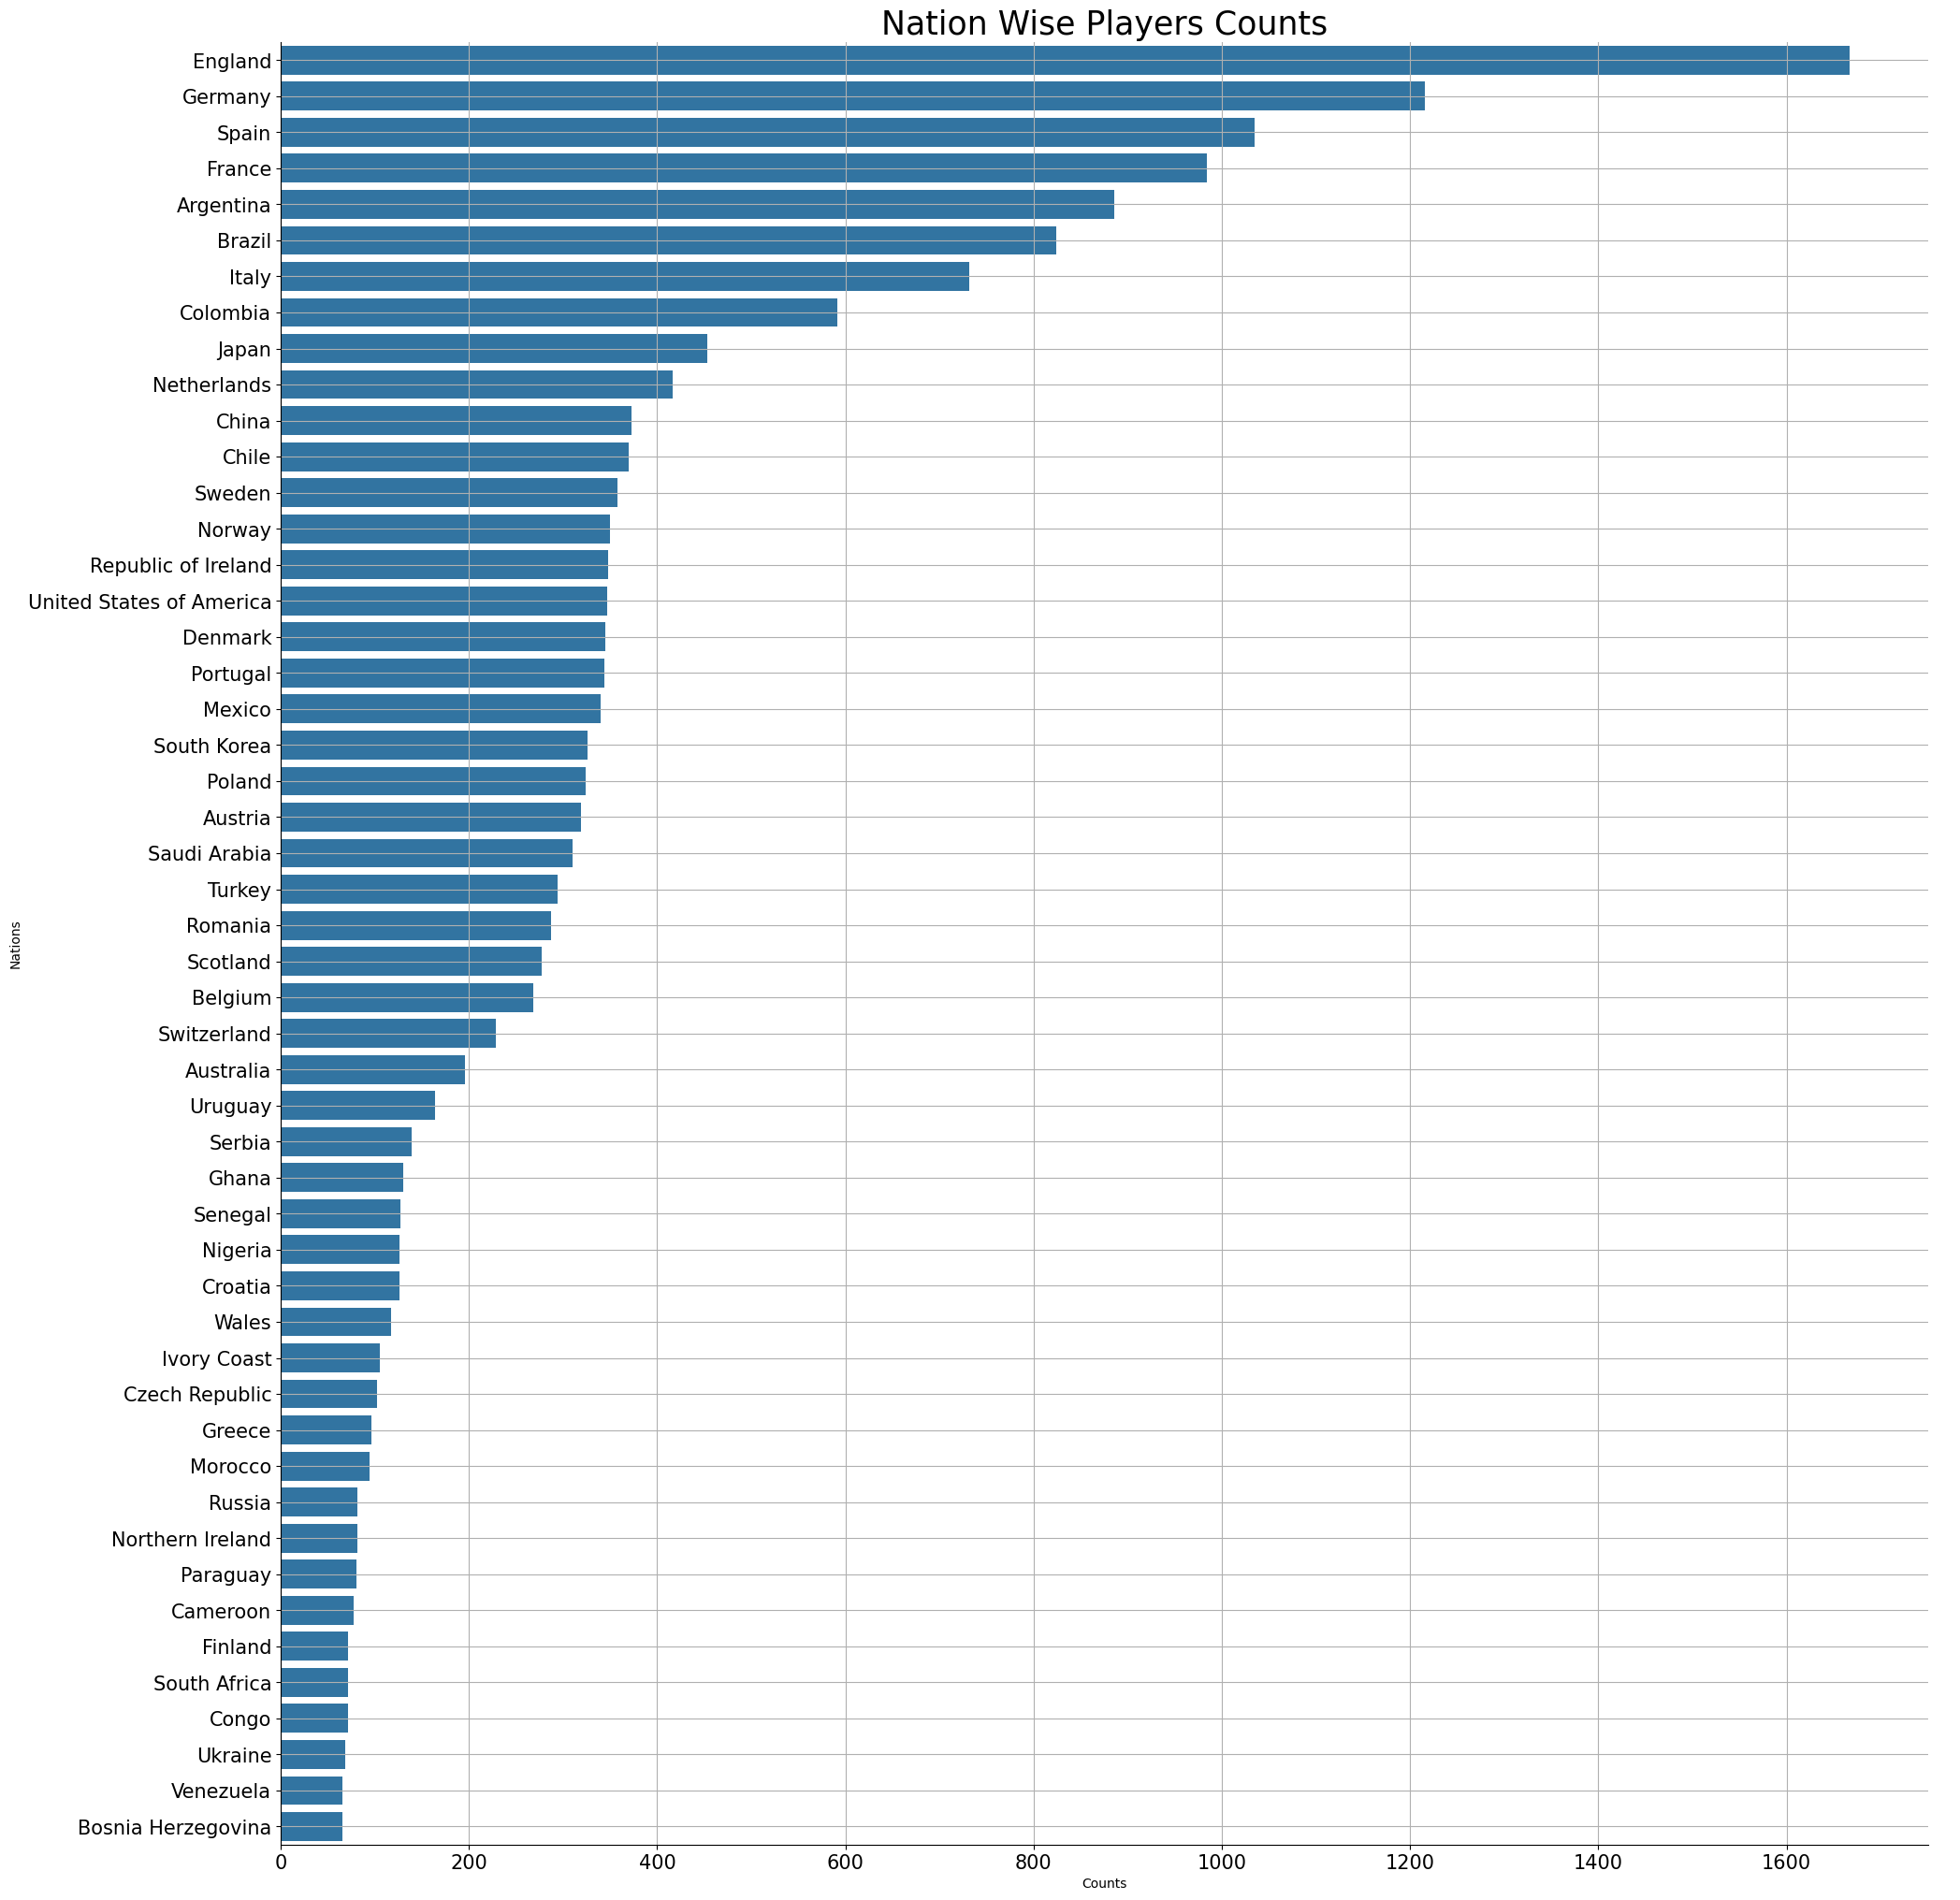

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

counts_Nationality = players_20_df["nationality"].value_counts()
counts_Nationality = counts_Nationality.reset_index()
counts_Nationality.columns= ["Nations","Counts"]
sns.catplot(y="Nations",x="Counts",data=counts_Nationality.head(50),height=20,kind="bar")
plt.title("Nation Wise Players Counts",fontsize=25)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.grid()
plt.show()

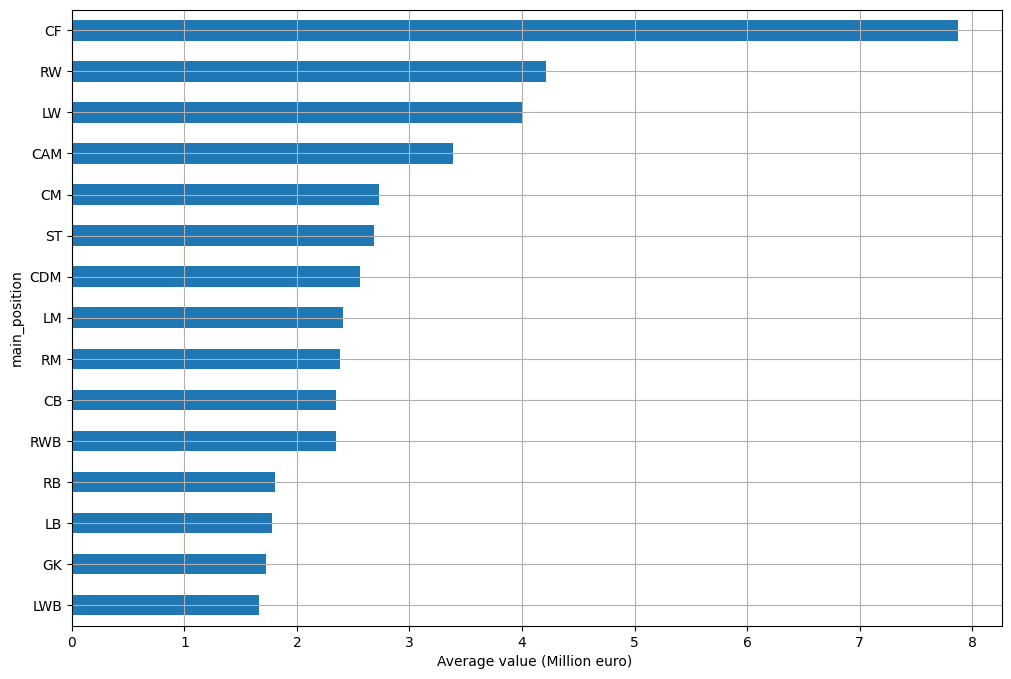

In [ ]:
players_20_df['main_position']=players_20_df['player_positions'].str.split(pat=',', n=-1, expand=True)[0]
Players_grouped=players_20_df.groupby('main_position')['value_eur'].mean()/1e6
Players_grouped=Players_grouped.sort_values()
Players_grouped.plot(kind='barh',figsize=(12,8))
plt.grid()
plt.xlabel("Average value (Million euro) ")
plt.show()


<ipython-input-33-bef9b10948f9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='nationality',data=players_20_df.head(20),palette='CMRmap')


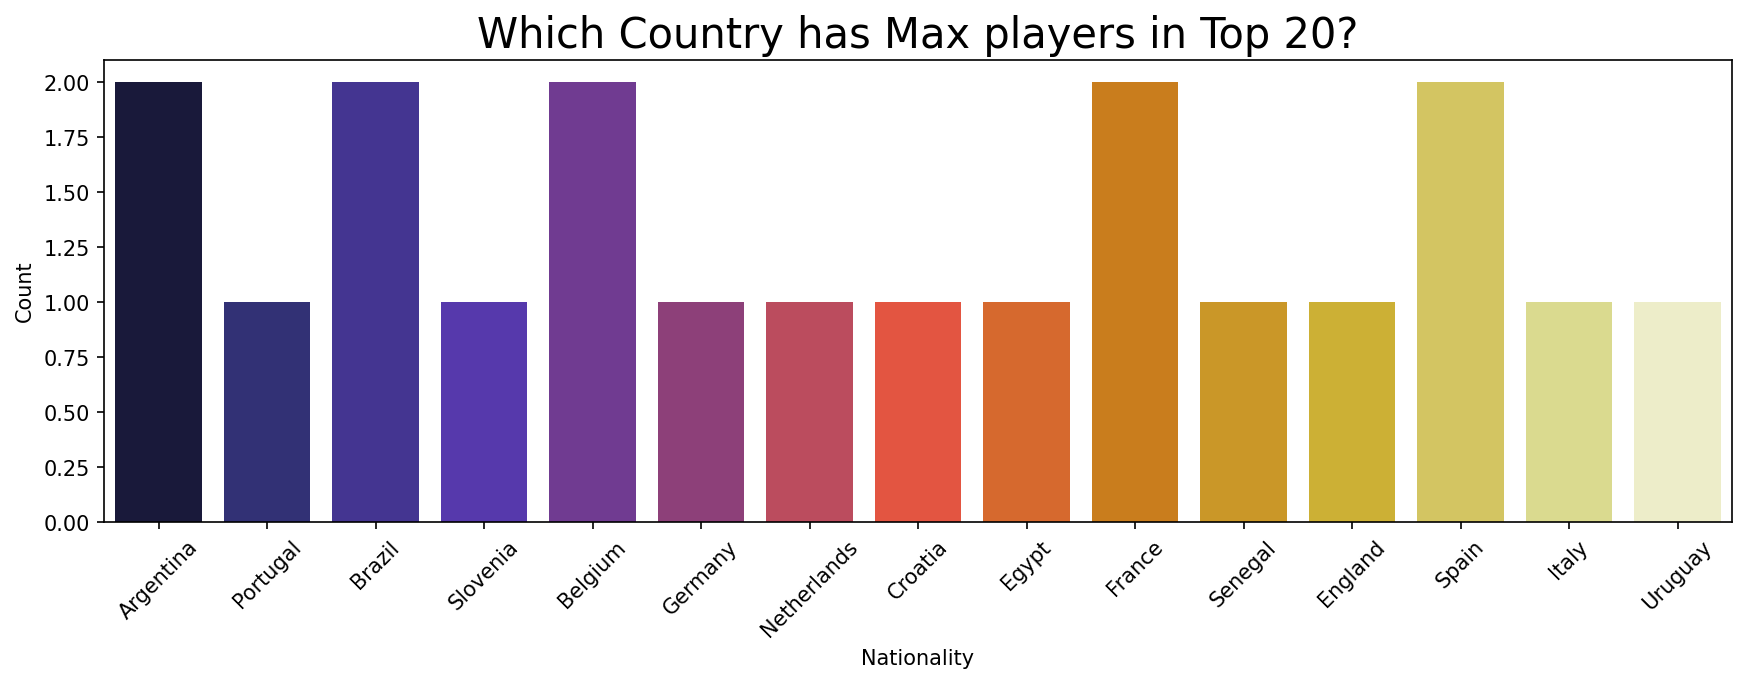

In [ ]:

plt.figure(figsize=(14,4),dpi=150)
sns.countplot(x='nationality',data=players_20_df.head(20),palette='CMRmap')
plt.xlabel('Nationality')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title('Which Country has Max players in Top 20?',fontsize = 20)
plt.show()

<ipython-input-34-0a132c3bec15>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='club', data=players_20_df.head(20), palette='CMRmap')


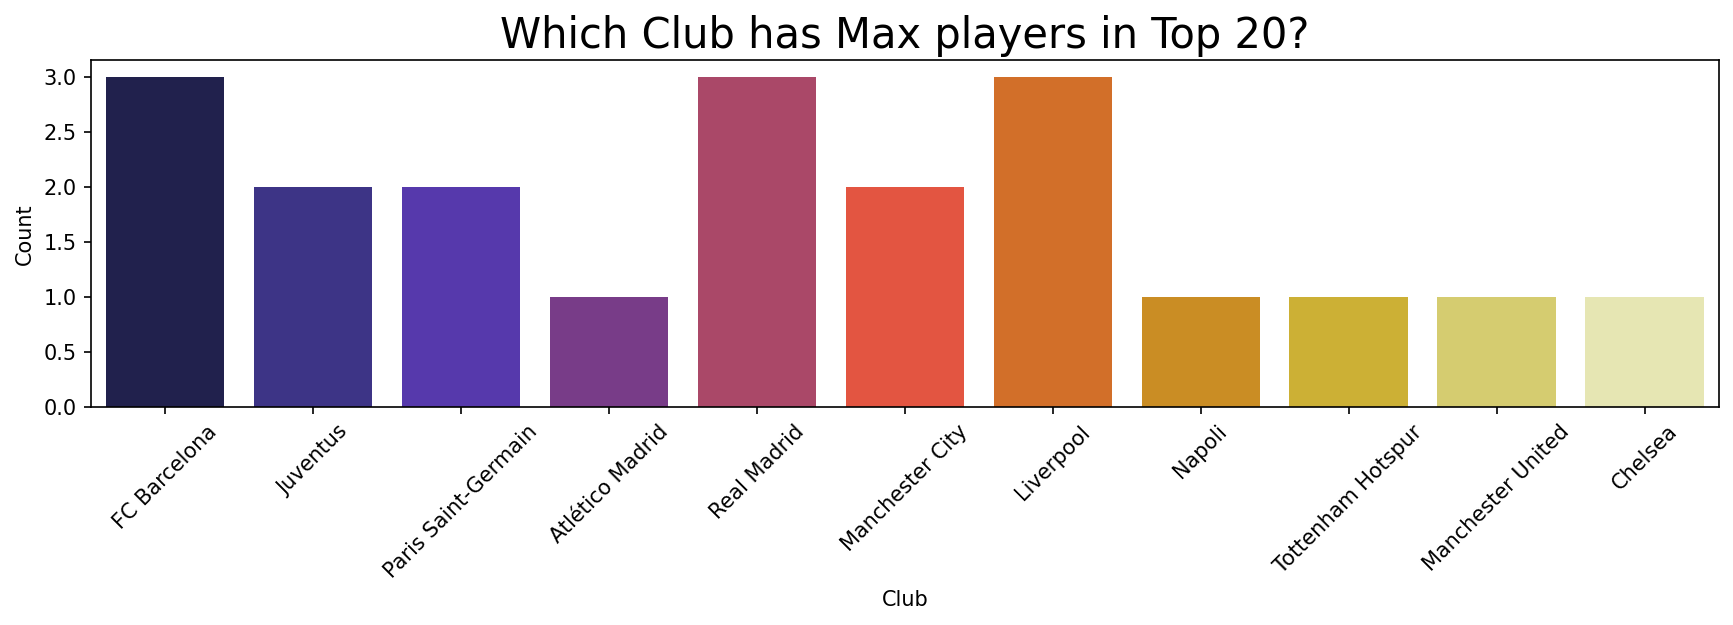

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


# Correcting the datasets and plotting
plt.figure(figsize=(14, 3), dpi=150)
sns.countplot(x='club', data=players_20_df.head(20), palette='CMRmap')
plt.xlabel('Club')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title('Which Club has Max players in Top 20?', fontsize=20)
plt.show()




<ipython-input-35-7daf716fb26b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='team_position', data=players_20_df.head(20), palette='CMRmap')


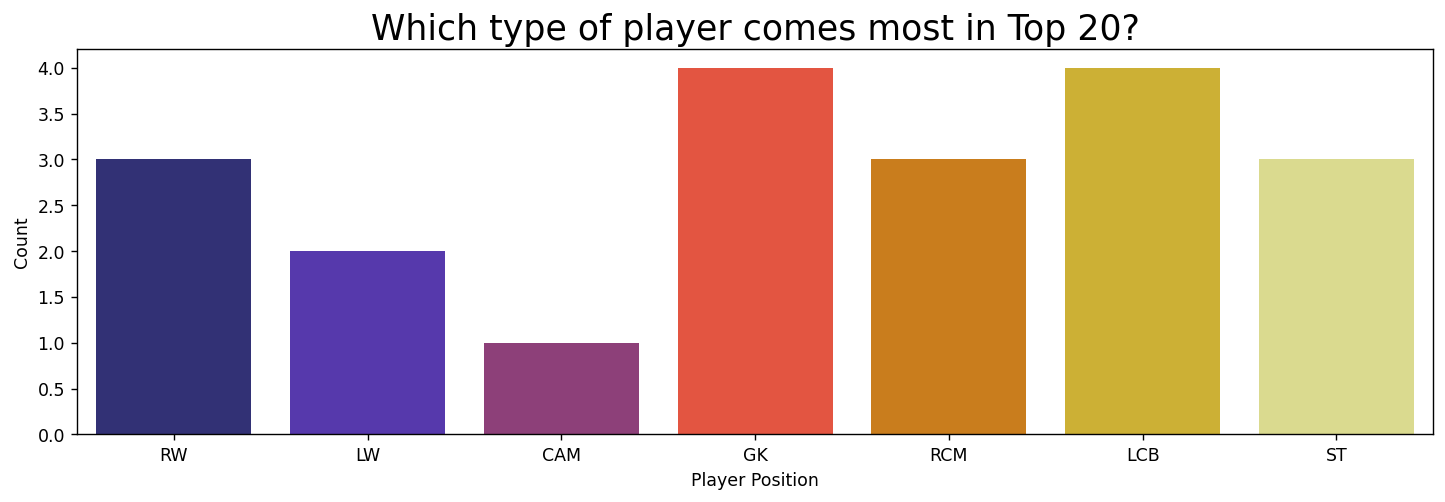

In [ ]:

plt.figure(figsize=(14, 4), dpi=125)
sns.countplot(x='team_position', data=players_20_df.head(20), palette='CMRmap')
plt.xlabel('Player Position')
plt.ylabel('Count')
plt.title('Which type of player comes most in Top 20?', fontsize=20)
plt.show()



<ipython-input-36-ee70944bc0b1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='age', data=players_20_df.head(20), palette='Blues')


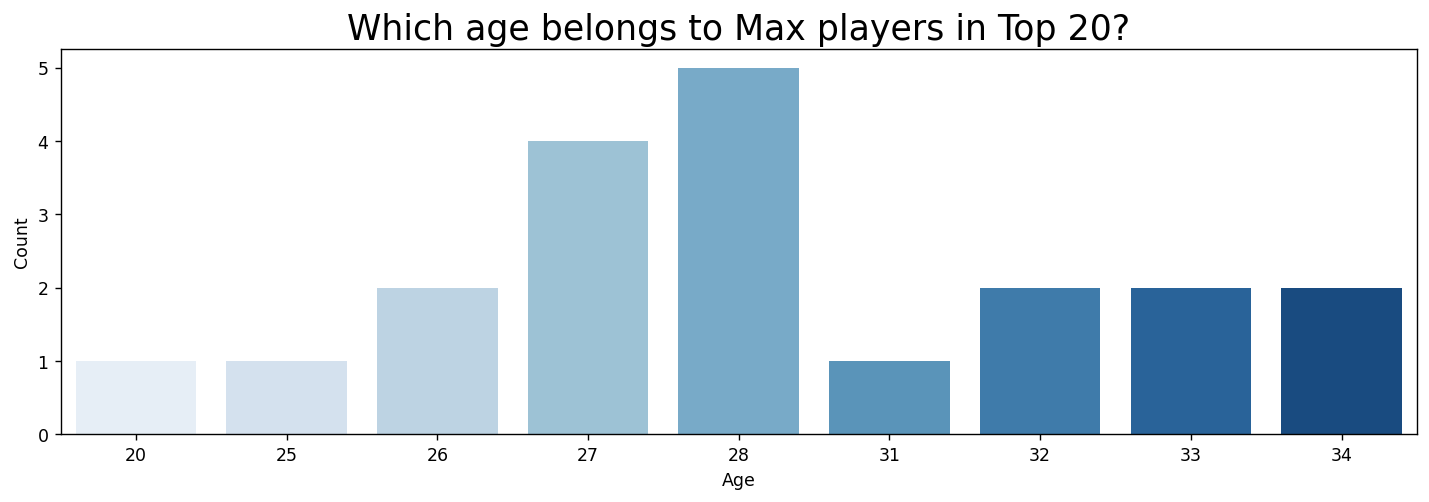

In [ ]:
plt.figure(figsize=(14, 4), dpi=125)
sns.countplot(x='age', data=players_20_df.head(20), palette='Blues')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Which age belongs to Max players in Top 20?', fontsize=20)
plt.show()

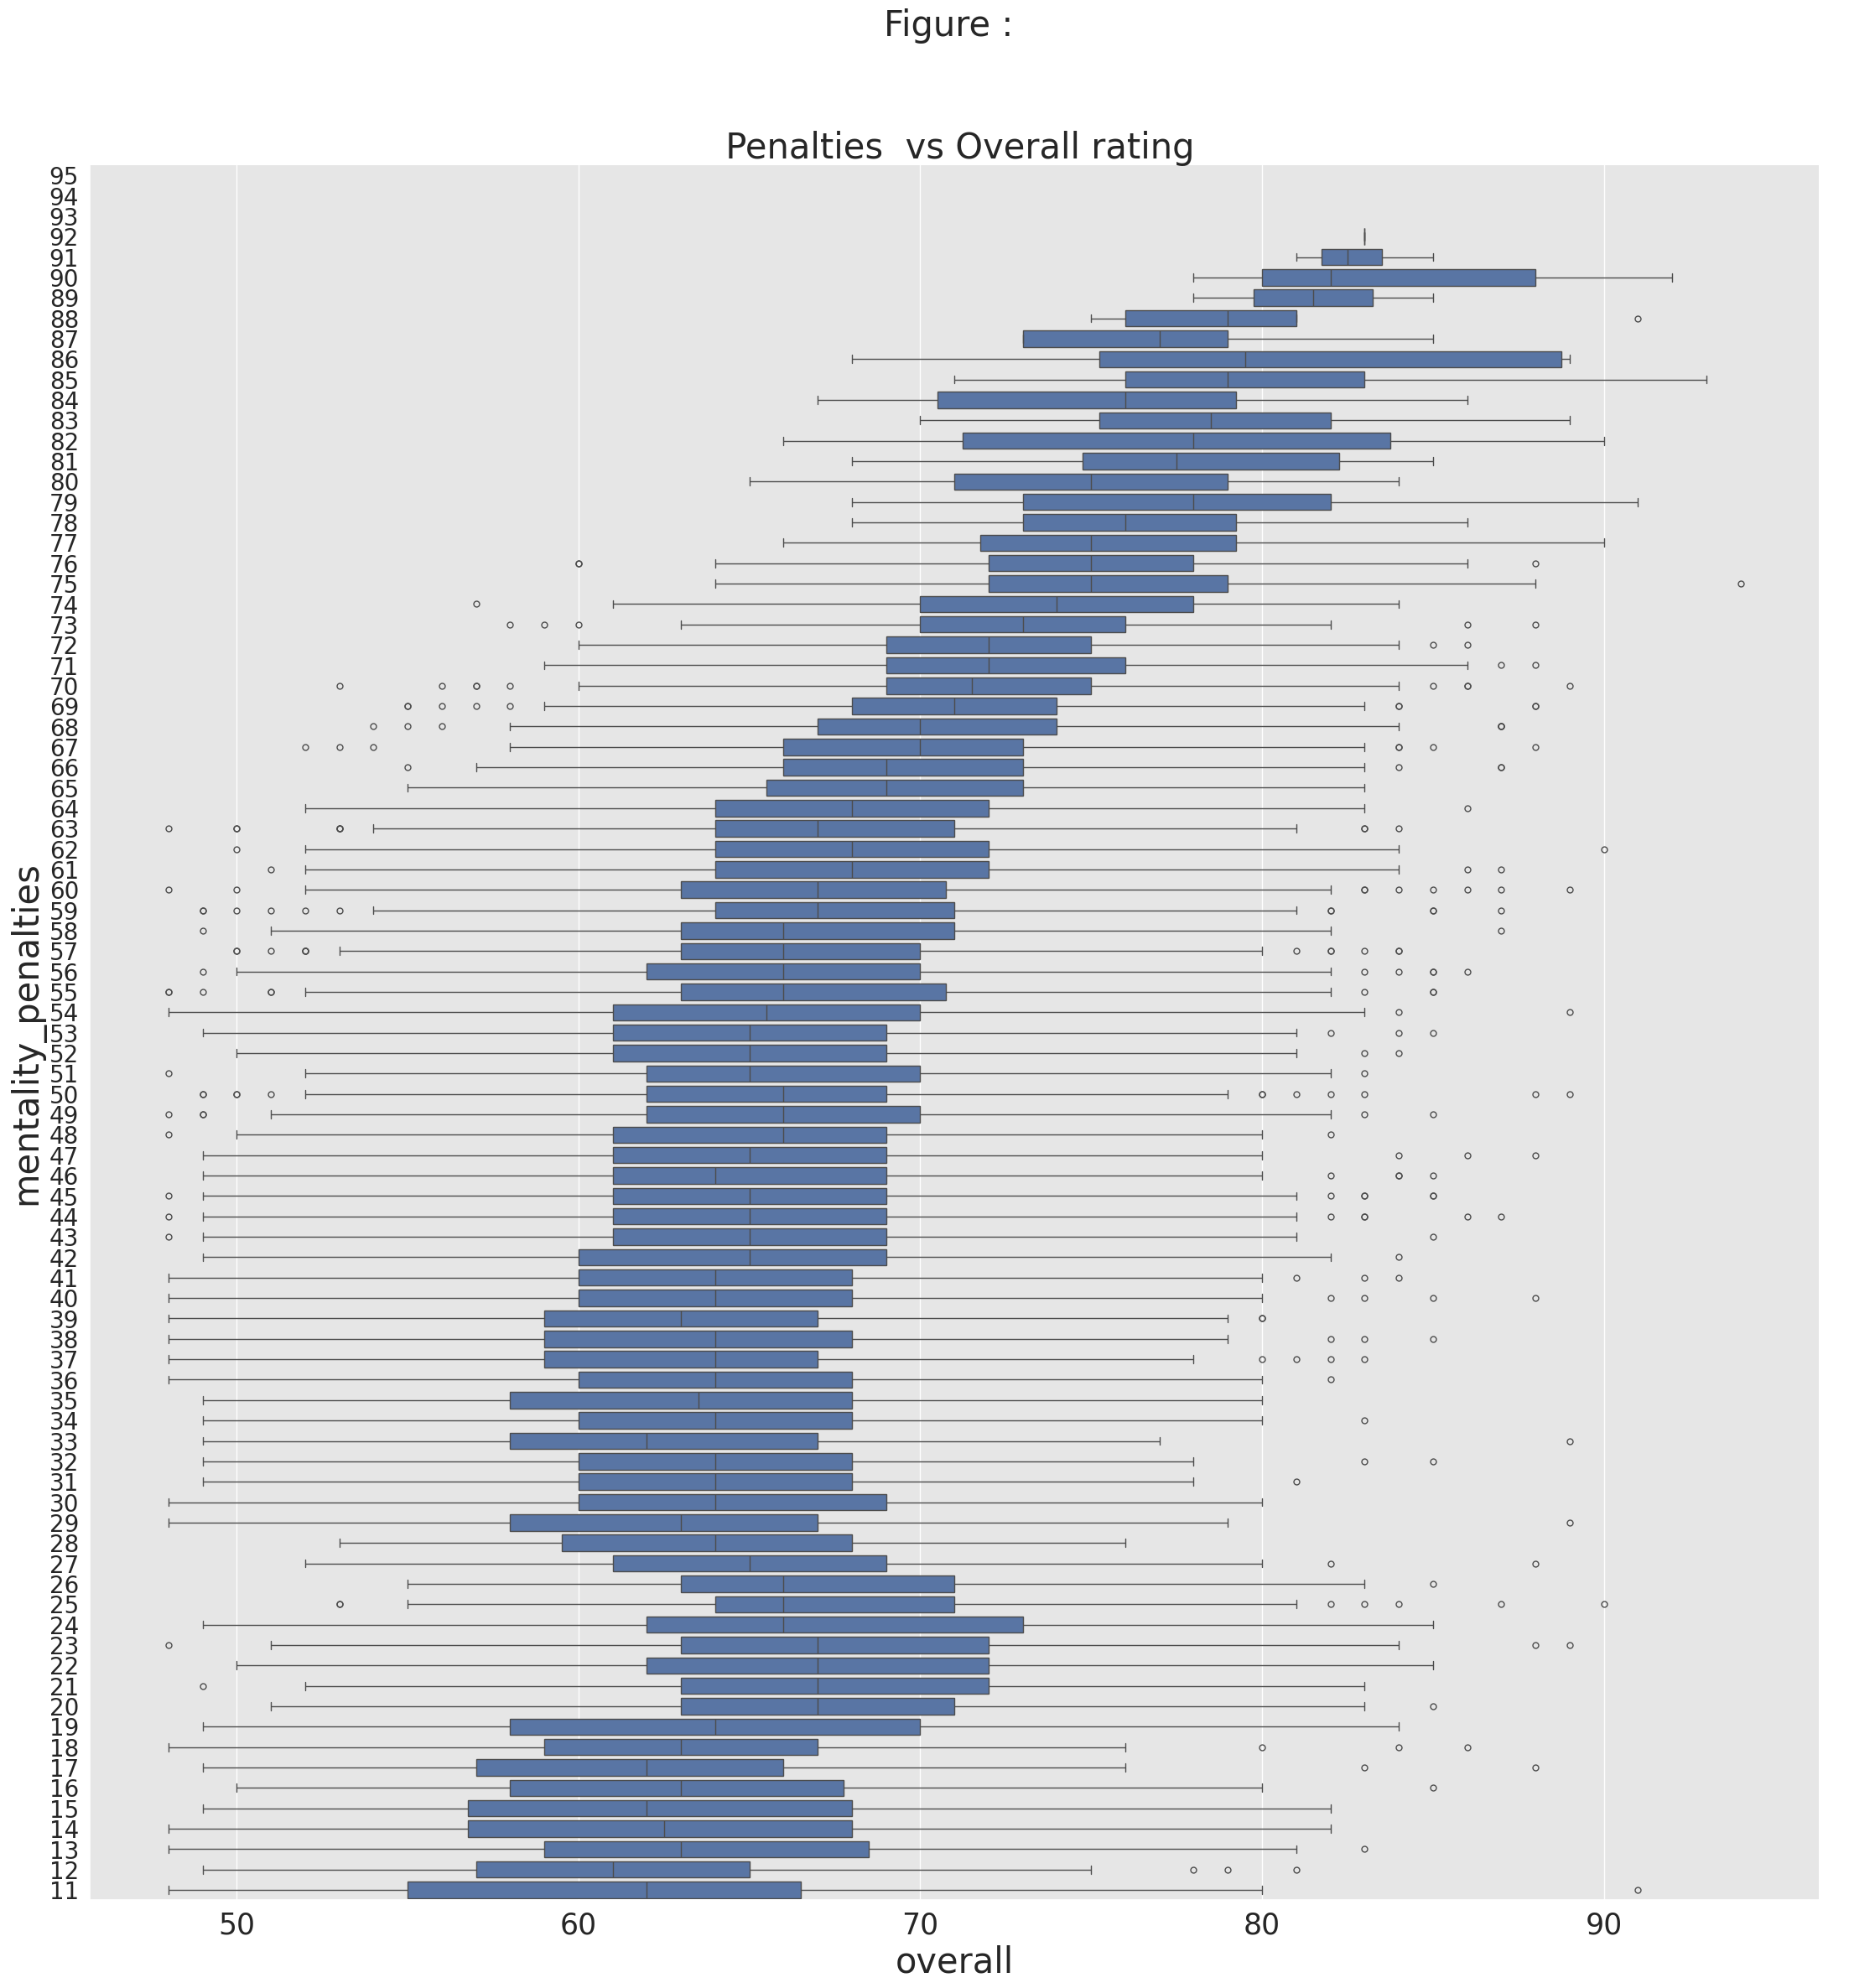

In [ ]:
sns.set(rc={"font.style":"normal",
            "axes.facecolor":(0.9, 0.9, 0.9),
            "figure.facecolor":'white',
            'axes.labelsize':30,
            'xtick.labelsize':25,
            'ytick.labelsize':20})
sns.catplot(y="mentality_penalties", x="overall",data=players_20_df,
            orient="h",order=range(95,10,-1),
            kind="box",height=22);
plt.title("Figure : \n\n\n Penalties  vs Overall rating", fontsize=30);

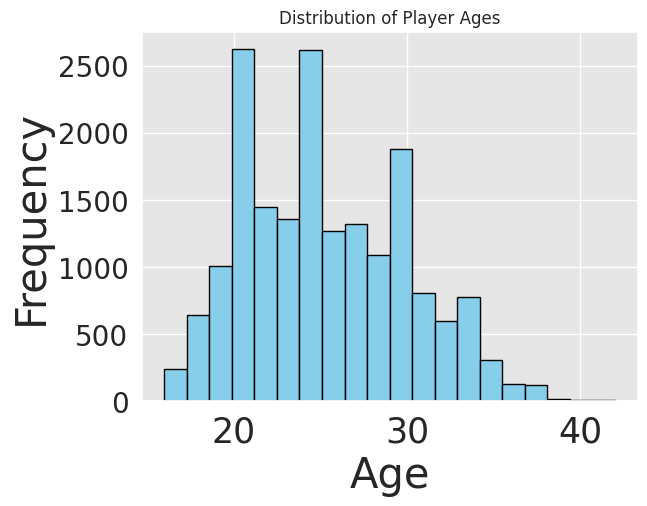

In [ ]:
import matplotlib.pyplot as plt

# Example: Histogram of player ages
plt.hist(players_20_df['age'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Player Ages')
plt.show()


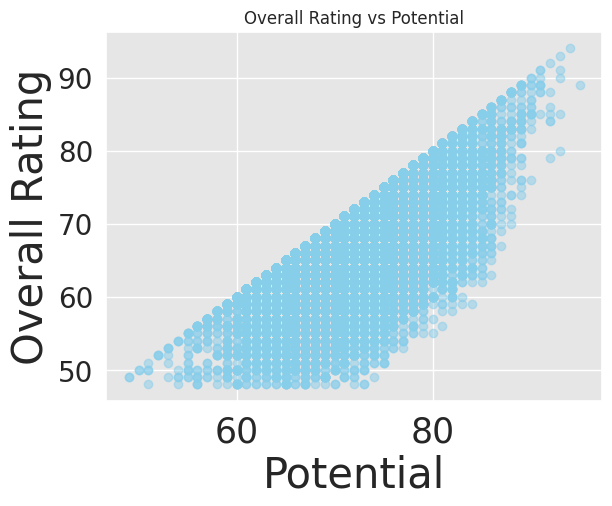

In [ ]:
import matplotlib.pyplot as plt

# Example: Scatter plot of overall rating against potential
plt.scatter(players_20_df['potential'], players_20_df['overall'], color='skyblue', alpha=0.5)
plt.xlabel('Potential')
plt.ylabel('Overall Rating')
plt.title('Overall Rating vs Potential')
plt.show()


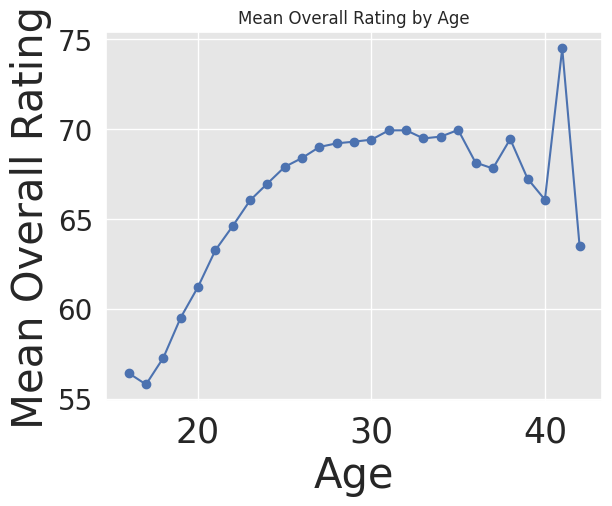

In [ ]:
import matplotlib.pyplot as plt

# Example: Line plot of overall rating over player age
age_overall_mean = players_20_df.groupby('age')['overall'].mean()
plt.plot(age_overall_mean.index, age_overall_mean.values, marker='o', linestyle='-')
plt.xlabel('Age')
plt.ylabel('Mean Overall Rating')
plt.title('Mean Overall Rating by Age')
plt.show()


In [ ]:
import plotly.express as px

# Example: Interactive scatter plot of overall rating against potential
fig = px.scatter(players_20_df, x='potential', y='overall', hover_name='short_name', color='player_positions', title='Overall Rating vs Potential', labels={'potential': 'Potential', 'overall': 'Overall Rating'})
fig.show()


# Dashboard

In [ ]:
import pandas as pd
import ipywidgets as widgets

# Function to extract specific club players
def Club(x):
    return players_20_df[players_20_df['club'] == x][['short_name','age','club',"player_positions","overall","value_eur"]].sort_values(by=['overall'], ascending=False)

# Create dropdown widget for club selection
club_dropdown = widgets.Dropdown(
    options=players_20_df['club'].unique(),
    description='Select Club:'
)

# Output widget to display information
output = widgets.Output()

# Function to handle dropdown change event
def on_dropdown_change(change):
    with output:
        output.clear_output()
        club_data = Club(change.new)
        display(club_data)

# Register dropdown change event
club_dropdown.observe(on_dropdown_change, names='value')

# Display widgets
display(club_dropdown)
display(output)


short_name  age  height_cm  weight_kg               nationality  \
15            N. Kanté   28        168         72                    France   
111               Kepa   24        186         85                     Spain   
144        Azpilicueta   29        178         76                     Spain   
199           Jorginho   27        180         67                     Italy   
240         M. Kovačić   25        176         78                   Croatia   
263         A. Rüdiger   26        190         85                   Germany   
296          O. Giroud   32        193         92                    France   
298            Willian   30        175         78                    Brazil   
309              Pedro   31        169         65                     Spain   
397      Marcos Alonso   28        188         87                     Spain   
414     A. Christensen   23        187         81                   Denmark   
435        T. Bakayoko   24        189         85                    France   
440           K. Zouma   24        190         96                    France   
583         C. Pulisic   20        177         69  United States of America   
591    R. Loftus-Cheek   23        191         88                   England   
624         R. Barkley   25        185         87                   England   
630       M. Batshuayi   25        185         88                   Belgium   
663      D. Zappacosta   27        182         72                     Italy   
1045           Emerson   24        175         77                     Italy   
1114     M. van Ginkel   26        186         82               Netherlands   
1274        T. Abraham   21        196         80                   England   
1618          M. Mount   20        178         64                   England   
1664            Kenedy   23        182         77                    Brazil   
1890      W. Caballero   37        186         81                 Argentina   
2123    C. Hudson-Odoi   18        177         75                   England   
2258           A. Baba   24        179         70                     Ghana   
2653          R. James   19        182         82                   England   
3309         F. Tomori   21        185         75                   England   
3592         M. Hector   26        193         82                   Jamaica   
3593      Lucas Piazon   25        182         73                    Brazil   
5966       J. Blackman   25        199         93                   England   
13105       B. Gilmour   18        170         67                  Scotland   
17362       J. Cumming   19        186         78                   England   

          club  overall  potential  value_eur  wage_eur  ... ldm cdm  rdm  \
15     Chelsea       89         90   66000000    235000  ...  87  87   87   
111    Chelsea       84         89   31000000     92000  ...   0   0    0   
144    Chelsea       84         84   25500000    145000  ...  82  82   82   
199    Chelsea       83         84   29000000    140000  ...  79  79   79   
240    Chelsea       82         87   29000000    125000  ...  77  77   77   
263    Chelsea       82         84   24000000    115000  ...  76  76   76   
296    Chelsea       82         82   17500000    140000  ...  59  59   59   
298    Chelsea       82         82   21000000    140000  ...  66  66   66   
309    Chelsea       82         82   19500000    140000  ...  61  61   61   
397    Chelsea       81         81   15000000    115000  ...  79  79   79   
414    Chelsea       80         87   19000000     85000  ...  76  76   76   
435    Chelsea       80         85   18000000     85000  ...  79  79   79   
440    Chelsea       80         84   17500000     85000  ...  72  72   72   
583    Chelsea       79         86   18000000     85000  ...  56  56   56   
591    Chelsea       79         85   17000000     89000  ...  72  72   72   
624    Chelsea       79         82   16000000     98000  ...  68  68   68   
630    Chelsea  

short_name  age  height_cm  weight_kg         nationality  \
38          P. Aubameyang   30        187         80               Gabon   
72           A. Lacazette   28        175         73              France   
122               B. Leno   27        190         83             Germany   
133              Sokratis   31        186         85              Greece   
135               M. Özil   30        180         76             Germany   
169               N. Pépé   24        183         73         Ivory Coast   
216            David Luiz   32        189         86              Brazil   
244           L. Torreira   23        168         64             Uruguay   
336         Dani Ceballos   22        179         70               Spain   
343              G. Xhaka   26        185         82         Switzerland   
398         H. Mkhitaryan   30        177         75             Armenia   
428       Héctor Bellerín   24        178         74               Spain   
632          S. Kolašinac   26        183         85  Bosnia Herzegovina   
639            S. Mustafi   27        184         82             Germany   
683         Nacho Monreal   33        180         77               Spain   
1126            M. Elneny   26        181         74               Egypt   
1261           K. Tierney   22        178         78            Scotland   
1305           R. Holding   23        189         75             England   
1620         M. Guendouzi   20        185         68              France   
1639    A. Maitland-Niles   21        177         71             England   
1718          E. Martínez   26        193         85           Argentina   
1721          C. Chambers   24        183         73             England   
3294            R. Nelson   19        175         71             England   
4793        K. Mavropanos   21        194         88              Greece   
6642   Gabriel Martinelli   18        180         75              Brazil   
7698           J. Willock   19        184         71             England   
9099             M. Macey   24        198         81             England   
9896              B. Saka   17        178         70             England   
9902        E. Smith Rowe   18        182         64             England   
9997           K. Nwakali   21        181         76             Nigeria   
12176           Z. Medley   18        195         75             England   
16376           R. Burton   19        170         65               Wales   
16745       T. John-Jules   18        175         75             England   

          club  overall  potential  value_eur  wage_eur  ... ldm cdm  rdm  \
38     Arsenal       88         88   57000000    205000  ...  58  58   58   
72     Arsenal       86         86   46000000    165000  ...  62  62   62   
122    Arsenal       84         86   26000000     91000  ...   0   0    0   
133    Arsenal       84         84   23000000    115000  ...  72  72   72   
135    Arsenal       84         84   29500000    125000  ...  55  55   55   
169    Arsenal       83         88   34500000     97000  ...  55  55   55   
216    Arsenal       83         83   16500000    105000  ...  79  79   79   
244    Arsenal       82         87   27000000     80000  ...  81  81   81   
336    Arsenal       81         87   24000000     82000  ...  76  76   76   
343    Arsenal       81         84   21500000     94000  ...  77  77   77   
398    Arsenal       81         81   17000000     94000  ...  68  68   68   
428    Arsenal       80         85   17500000     69000  ...  74  74   74   
632    Arsenal       79         82   13500000     76000  ...  75  75   75   
639    Arsenal       79         81   13000000     76000  ...  73  73   73   
683    Arsenal       79         79    5500000     76000  ...  75  75   75   
1126   Arsenal       77         78    9500000     65000  ...  75  75   75   
1261   Arsenal       76         86   11000000     52000  ...  73  73   73   
1305   Arsenal       76         83   1000000

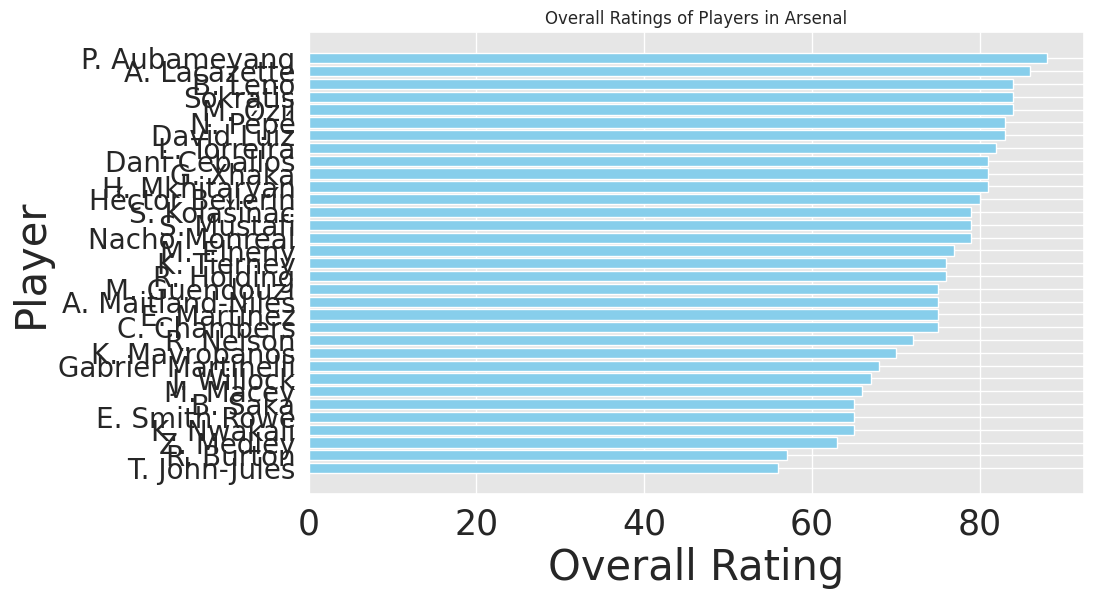

In [ ]:
# Function to extract specific club players
def Club(x):
    return players_20_df[players_20_df['club'] == x][['short_name','age','club',"player_positions","overall","value_eur"]].sort_values(by=['overall'], ascending=False)

# Create dropdown widget for club selection
club_dropdown = widgets.Dropdown(
    options=players_20_df['club'].unique(),
    description='Select Club:'
)

# Output widget to display information
output = widgets.Output()

# Function to handle dropdown change event
def on_dropdown_change(change):
    with output:
        output.clear_output()
        club_data = Club(change.new)
        display(club_data)
        plt.figure(figsize=(10, 6))
        plt.barh(club_data['short_name'], club_data['overall'], color='skyblue')
        plt.xlabel('Overall Rating')
        plt.ylabel('Player')
        plt.title('Overall Ratings of Players in {}'.format(change.new))
        plt.gca().invert_yaxis()  # Invert y-axis to display highest overall rating at the top
        plt.show()

# Register dropdown change event
club_dropdown.observe(on_dropdown_change, names='value')

# Display widgets
display(club_dropdown)
display(output)

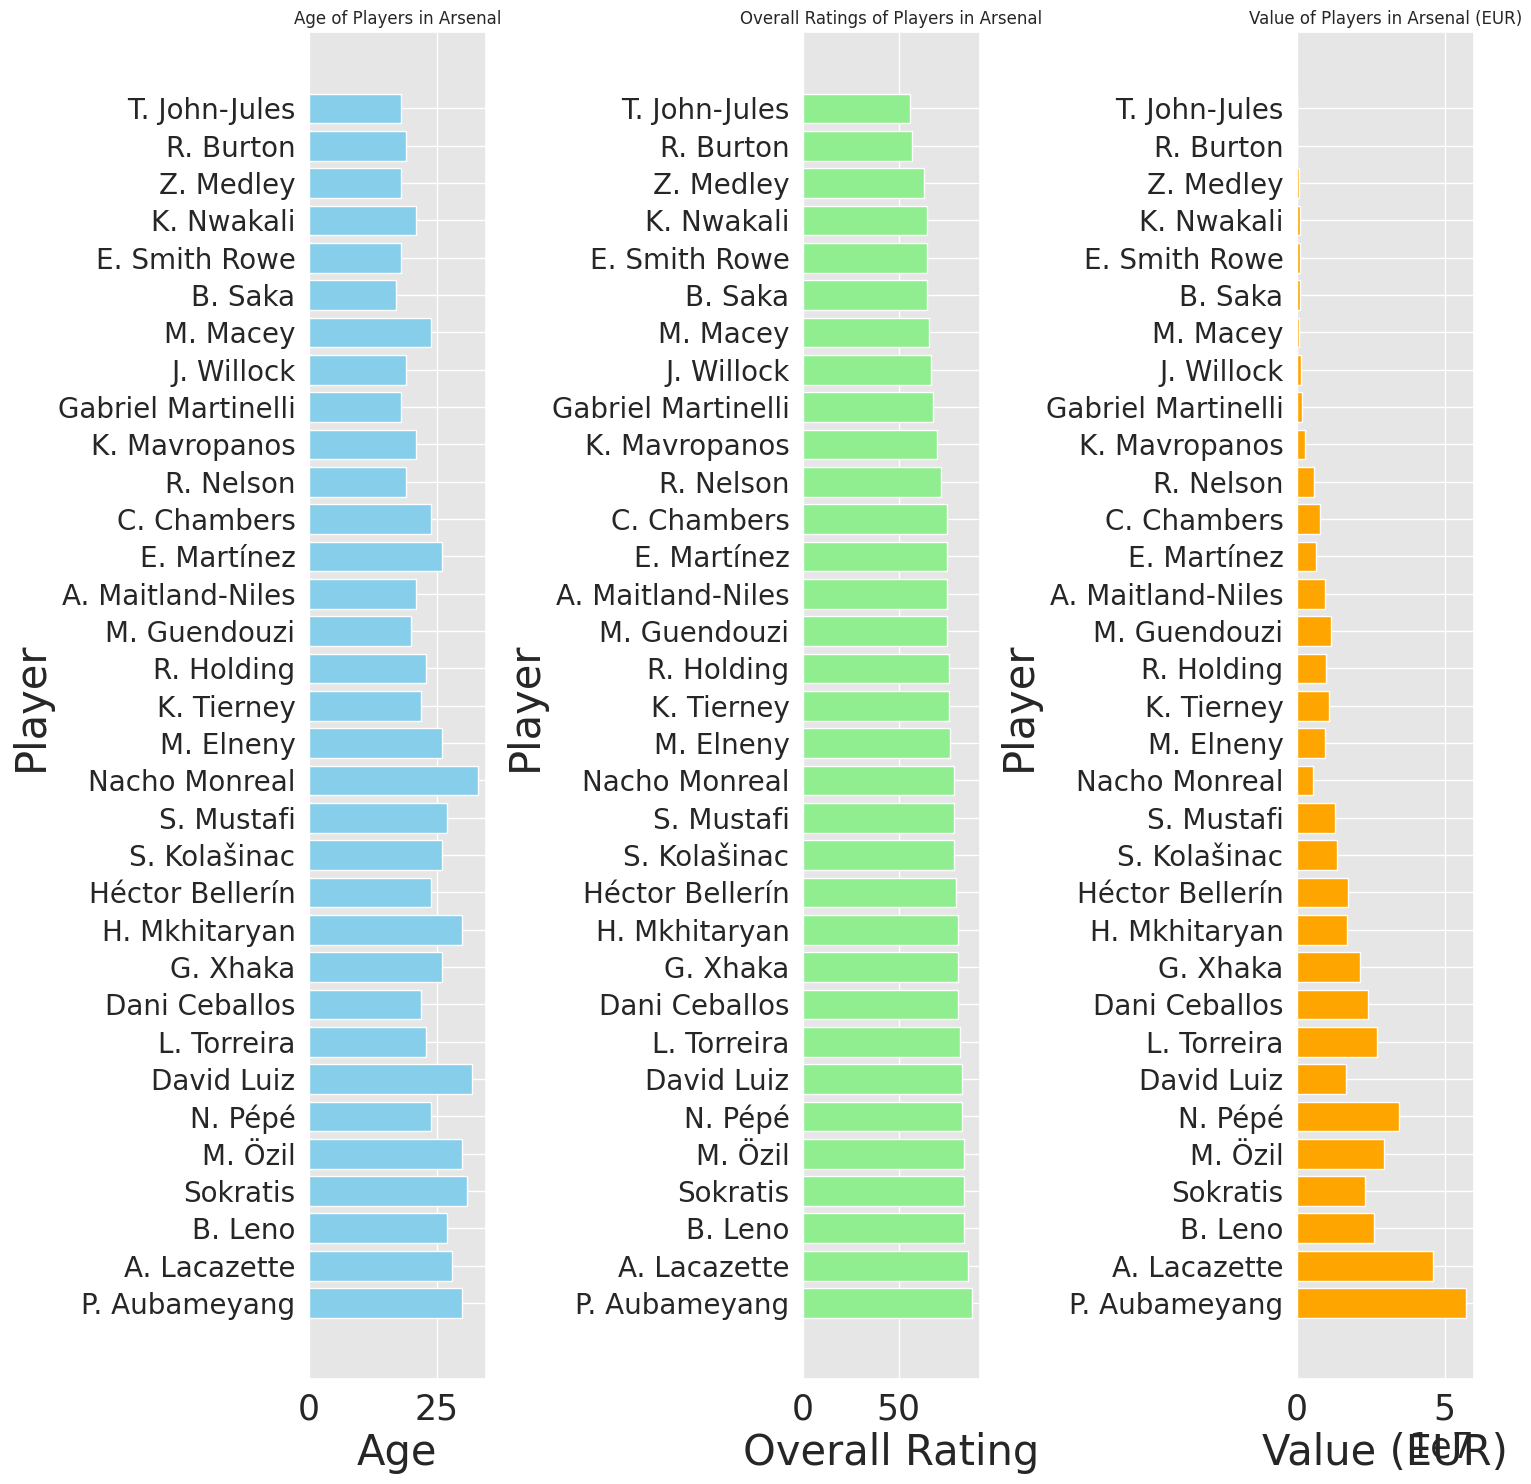

In [ ]:
import pandas as pd
import ipywidgets as widgets
import matplotlib.pyplot as plt

# Function to extract specific club players
def Club(x):
    return players_20_df[players_20_df['club'] == x]

# Create dropdown widget for club selection
club_dropdown = widgets.Dropdown(
    options=players_20_df['club'].unique(),
    description='Select Club:'
)

# Output widget to display information
output = widgets.Output()

# Function to handle dropdown change event
def on_dropdown_change(change):
    with output:
        output.clear_output()
        club_data = Club(change.new)
        plt.figure(figsize=(15, 15))
        plt.subplot(1, 3, 1)
        plt.barh(club_data['short_name'], club_data['age'], color='skyblue')
        plt.xlabel('Age')
        plt.ylabel('Player')
        plt.title('Age of Players in {}'.format(change.new))

        plt.subplot(1, 3, 2)
        plt.barh(club_data['short_name'], club_data['overall'], color='lightgreen')
        plt.xlabel('Overall Rating')
        plt.ylabel('Player')
        plt.title('Overall Ratings of Players in {}'.format(change.new))

        plt.subplot(1, 3, 3)
        plt.barh(club_data['short_name'], club_data['value_eur'], color='orange')
        plt.xlabel('Value (EUR)')
        plt.ylabel('Player')
        plt.title('Value of Players in {} (EUR)'.format(change.new))

        plt.tight_layout()
        plt.show()

# Register dropdown change event
club_dropdown.observe(on_dropdown_change, names='value')

# Display widgets
display(club_dropdown)
display(output)


In [ ]:
import pandas as pd
import ipywidgets as widgets
import matplotlib.pyplot as plt


# Function to extract specific club players
def Club(x):
    return players_20_df[players_20_df['club'] == x]

# Dictionary to map short position names to full names
position_names = {
    'ls': 'Left Striker',
    'st': 'Striker',
    'rs': 'Right Striker',
    'lw': 'Left Winger',
    'lf': 'Left Forward',
    'cf': 'Center Forward',
    'rf': 'Right Forward',
    'rw': 'Right Winger',
    'lam': 'Left Attacking Midfielder',
    'cam': 'Center Attacking Midfielder',
    'ram': 'Right Attacking Midfielder',
    'lm': 'Left Midfielder',
    'lcm': 'Left Center Midfielder',
    'cm': 'Center Midfielder',
    'rcm': 'Right Center Midfielder',
    'rm': 'Right Midfielder',
    'lwb': 'Left Wing-Back',
    'ldm': 'Left Defensive Midfielder',
    'cdm': 'Center Defensive Midfielder',
    'rdm': 'Right Defensive Midfielder',
    'rwb': 'Right Wing-Back',
    'lb': 'Left Back',
    'lcb': 'Left Center Back',
    'cb': 'Center Back',
    'rcb': 'Right Center Back',
    'rb': 'Right Back'
}

# Create dropdown widget for club selection
club_dropdown = widgets.Dropdown(
    options=players_20_df['club'].unique(),
    description='Select Club:'
)

# Output widget to display information
output = widgets.Output()

# Function to handle dropdown change event
def on_dropdown_change(change):
    with output:
        output.clear_output()
        club_data = Club(change.new)
        plt.figure(figsize=(15, 10))
        for i, column in enumerate(['ls','st','rs']):
            plt.subplot(1, 3, i+1)
            positions = club_data[column].apply(lambda x: position_names.get(x, x))
            plt.barh(club_data['short_name'], club_data[column], color='skyblue')
            plt.xlabel('Rating')
            plt.ylabel('Player')
            plt.title('Rating of {} in {}'.format(column.upper(), change.new))
            plt.xticks(rotation=45)
            plt.gca().invert_yaxis()  # Invert y-axis to display highest overall rating at the top
            plt.tight_layout()

        plt.show()

# Register dropdown change event
club_dropdown.observe(on_dropdown_change, names='value')

# Display widgets
display(club_dropdown)
display(output)


Dropdown(description='Select Club:', options=('FC Barcelona', 'Juventus', 'Paris Saint-Germain', 'Atlético Mad…

Output()

In [ ]:
import pandas as pd
import ipywidgets as widgets
import matplotlib.pyplot as plt


# Function to extract specific club players
def Club(x):
    return players_20_df[players_20_df['club'] == x]

# Dictionary to map short position names to full names
position_names = {
    'ls': 'Left Striker',
    'st': 'Striker',
    'rs': 'Right Striker',
    'lw': 'Left Winger',
    'lf': 'Left Forward',
    'cf': 'Center Forward',
    'rf': 'Right Forward',
    'rw': 'Right Winger',
    'lam': 'Left Attacking Midfielder',
    'cam': 'Center Attacking Midfielder',
    'ram': 'Right Attacking Midfielder',
    'lm': 'Left Midfielder',
    'lcm': 'Left Center Midfielder',
    'cm': 'Center Midfielder',
    'rcm': 'Right Center Midfielder',
    'rm': 'Right Midfielder',
    'lwb': 'Left Wing-Back',
    'ldm': 'Left Defensive Midfielder',
    'cdm': 'Center Defensive Midfielder',
    'rdm': 'Right Defensive Midfielder',
    'rwb': 'Right Wing-Back',
    'lb': 'Left Back',
    'lcb': 'Left Center Back',
    'cb': 'Center Back',
    'rcb': 'Right Center Back',
    'rb': 'Right Back'
}

# Create dropdown widgets for club selection and position selection
club_dropdown = widgets.Dropdown(
    options=players_20_df['club'].unique(),
    description='Select Club:'
)

position_dropdown = widgets.Dropdown(
    options=position_names.values(),
    description='Select Position:'
)

# Output widget to display information
output = widgets.Output()

# Function to handle dropdown change event
def on_dropdown_change(change):
    with output:
        output.clear_output()
        club_data = Club(club_dropdown.value)
        position_key = [key for key, value in position_names.items() if value == position_dropdown.value][0]
        plt.figure(figsize=(10, 10))
        plt.barh(club_data['short_name'], club_data[position_key], color='skyblue')
        plt.xlabel('Rating')
        plt.ylabel('Player')
        plt.title('Rating of {} in {}'.format(position_dropdown.value, club_dropdown.value))
        plt.xticks(rotation=45)
        plt.gca().invert_yaxis()  # Invert y-axis to display highest overall rating at the top
        plt.tight_layout()
        plt.show()

# Register dropdown change event
club_dropdown.observe(on_dropdown_change, names='value')
position_dropdown.observe(on_dropdown_change, names='value')

# Display widgets
display(widgets.HBox([club_dropdown, position_dropdown]))
display(output)


Output()

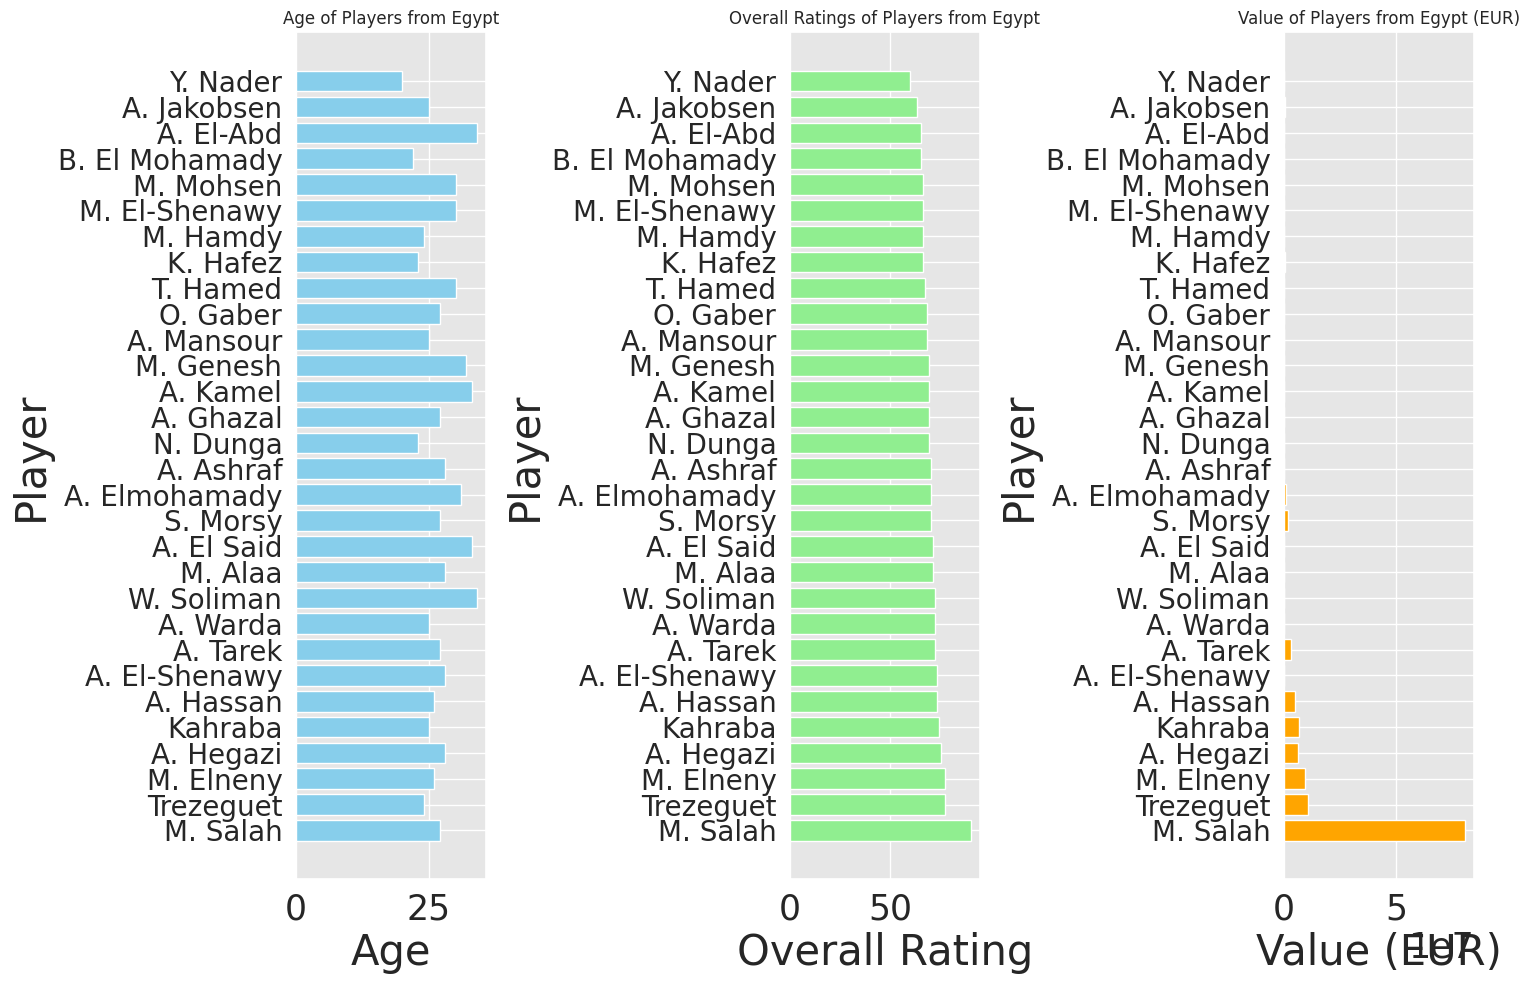

In [ ]:
import pandas as pd
import ipywidgets as widgets
import matplotlib.pyplot as plt

# Function to extract specific nationality players
def Nationality(x):
    return players_20_df[players_20_df['nationality'] == x]

# Create dropdown widget for nationality selection
nationality_dropdown = widgets.Dropdown(
    options=players_20_df['nationality'].unique(),
    description='Select Nationality:'
)

# Output widget to display information
output = widgets.Output()

# Function to handle dropdown change event
def on_dropdown_change(change):
    with output:
        output.clear_output()
        nationality_data = Nationality(change.new)
        plt.figure(figsize=(15, 10))
        plt.subplot(1, 3, 1)
        plt.barh(nationality_data['short_name'], nationality_data['age'], color='skyblue')
        plt.xlabel('Age')
        plt.ylabel('Player')
        plt.title('Age of Players from {}'.format(change.new))

        plt.subplot(1, 3, 2)
        plt.barh(nationality_data['short_name'], nationality_data['overall'], color='lightgreen')
        plt.xlabel('Overall Rating')
        plt.ylabel('Player')
        plt.title('Overall Ratings of Players from {}'.format(change.new))

        plt.subplot(1, 3, 3)
        plt.barh(nationality_data['short_name'], nationality_data['value_eur'], color='orange')
        plt.xlabel('Value (EUR)')
        plt.ylabel('Player')
        plt.title('Value of Players from {} (EUR)'.format(change.new))

        plt.tight_layout()
        plt.show()

# Register dropdown change event
nationality_dropdown.observe(on_dropdown_change, names='value')

# Display widgets
display(nationality_dropdown)
display(output)


In [ ]:
import pandas as pd
import ipywidgets as widgets
import matplotlib.pyplot as plt

# Function to extract specific nationality players
def Nationality(x):
    return players_20_df[players_20_df['nationality'] == x]

# Create dropdown widgets for nationality selection and position selection
nationality_dropdown = widgets.Dropdown(
    options=players_20_df['nationality'].unique(),
    description='Select Nationality:'
)

position_dropdown = widgets.Dropdown(
    options=position_names.values(),
    description='Select Position:'
)

# Output widget to display information
output = widgets.Output()

# Function to handle dropdown change event
def on_dropdown_change(change):
    with output:
        output.clear_output()
        nationality_data = Nationality(nationality_dropdown.value)
        position_key = [key for key, value in position_names.items() if value == position_dropdown.value][0]
        plt.figure(figsize=(10, 10))
        plt.barh(nationality_data['short_name'], nationality_data[position_key], color='skyblue')
        plt.xlabel('Rating')
        plt.ylabel('Player')
        plt.title('Rating of {} in {}'.format(position_dropdown.value, nationality_dropdown.value))
        plt.xticks(rotation=45)
        plt.gca().invert_yaxis()  # Invert y-axis to display highest overall rating at the top
        plt.tight_layout()
        plt.show()

# Register dropdown change event
nationality_dropdown.observe(on_dropdown_change, names='value')
position_dropdown.observe(on_dropdown_change, names='value')

# Display widgets
display(widgets.HBox([nationality_dropdown, position_dropdown]))
display(output)


Output()

In [ ]:
import pandas as pd
import ipywidgets as widgets
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Function to extract specific club players
def Club(x):
    return players_20_df[players_20_df['club'] == x]

# Create dropdown widget for club selection
club_dropdown = widgets.Dropdown(
    options=players_20_df['club'].unique(),
    description='Select Club:'
)

# Output widget to display information
output = widgets.Output()

# Function to handle dropdown change event
def on_dropdown_change(change):
    with output:
        output.clear_output()
        club_data = Club(change.new)
        plt.subplots(dpi=150)
        wordcloud = WordCloud(background_color='white', width=1920, height=1080).generate(" ".join(club_data.head(10)['short_name']))
        plt.imshow(wordcloud)
        plt.axis('off')
        plt.title(f'Most Rated Players in {change.new}')
        plt.show()

# Register dropdown change event
club_dropdown.observe(on_dropdown_change, names='value')

# Display widgets
display(club_dropdown)
display(output)


Dropdown(description='Select Club:', options=('FC Barcelona', 'Juventus', 'Paris Saint-Germain', 'Atlético Mad…

Output()

In [ ]:
import pandas as pd
import ipywidgets as widgets
import matplotlib.pyplot as plt


# Dictionary to map short position names to full names
position_names = {
    'ls': 'Left Striker',
    'st': 'Striker',
    'rs': 'Right Striker',
    'lw': 'Left Winger',
    'lf': 'Left Forward',
    'cf': 'Center Forward',
    'rf': 'Right Forward',
    'rw': 'Right Winger',
    'lam': 'Left Attacking Midfielder',
    'cam': 'Center Attacking Midfielder',
    'ram': 'Right Attacking Midfielder',
    'lm': 'Left Midfielder',
    'lcm': 'Left Center Midfielder',
    'cm': 'Center Midfielder',
    'rcm': 'Right Center Midfielder',
    'rm': 'Right Midfielder',
    'lwb': 'Left Wing-Back',
    'ldm': 'Left Defensive Midfielder',
    'cdm': 'Center Defensive Midfielder',
    'rdm': 'Right Defensive Midfielder',
    'rwb': 'Right Wing-Back',
    'lb': 'Left Back',
    'lcb': 'Left Center Back',
    'cb': 'Center Back',
    'rcb': 'Right Center Back',
    'rb': 'Right Back'
}

# Function to extract specific club players
def Club(x):
    return players_20_df[players_20_df['club'] == x]

# Create dropdown widget for club selection
club_dropdown = widgets.Dropdown(
    options=players_20_df['club'].unique(),
    description='Select Club:'
)

# Output widget to display information
output = widgets.Output()

# Function to handle dropdown change event
def on_dropdown_change(change):
    with output:
        output.clear_output()
        club_data = Club(change.new)
        num_positions = len(position_names)
        plt.figure(figsize=(15, 10 * num_positions))
        for i, (column, full_name) in enumerate(position_names.items()):
            plt.subplot(num_positions, 1, i+1)
            positions = club_data[column].apply(lambda x: position_names.get(x, x))
            plt.barh(club_data['short_name'], club_data[column], color='skyblue')
            plt.xlabel('Rating')
            plt.ylabel('Player')
            plt.title('Rating of {} in {}'.format(full_name, change.new))
            plt.xticks(rotation=45)
            plt.gca().invert_yaxis()  # Invert y-axis to display highest overall rating at the top
            plt.tight_layout()

        plt.show()

# Register dropdown change event
club_dropdown.observe(on_dropdown_change, names='value')

# Display widgets
display(club_dropdown)
display(output)


Dropdown(description='Select Club:', options=('FC Barcelona', 'Juventus', 'Paris Saint-Germain', 'Atlético Mad…

Output()

In [ ]:
import pandas as pd
import ipywidgets as widgets
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Function to extract players from a specific nationality
def Nationality(x):
    return players_20_df[players_20_df['nationality'] == x]

# Create dropdown widget for nationality selection
nationality_dropdown = widgets.Dropdown(
    options=players_20_df['nationality'].unique(),
    description='Select Nationality:'
)

# Output widget to display information
output = widgets.Output()

# Function to handle dropdown change event
def on_dropdown_change(change):
    with output:
        output.clear_output()
        nationality_data = Nationality(change.new)
        plt.subplots(dpi=150)
        wordcloud = WordCloud(background_color='white', width=1920, height=1080).generate(" ".join(nationality_data.head(10)['short_name']))
        plt.imshow(wordcloud)
        plt.axis('off')
        plt.title(f'Most Rated Players from {change.new}')
        plt.show()

# Register dropdown change event
nationality_dropdown.observe(on_dropdown_change, names='value')

# Display widgets
display(nationality_dropdown)
display(output)


Dropdown(description='Select Nationality:', options=('Argentina', 'Portugal', 'Brazil', 'Slovenia', 'Belgium',…

Output()

In [ ]:
filtered_nationalities = players_20_df[players_20_df['nationality'].str.contains('P')]
nationality_counts = filtered_nationalities['nationality'].value_counts()

for country, count in nationality_counts.items():
    print(f"'{country}': {count}")


'Portugal': 344
'Poland': 324
'Paraguay': 80
'Peru': 35
'Panama': 12
'Palestine': 4
'Philippines': 2
'Puerto Rico': 1
'São Tomé & Príncipe': 1


<ipython-input-48-a2341e91231b>:5: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



<Figure size 3000x2000 with 0 Axes>

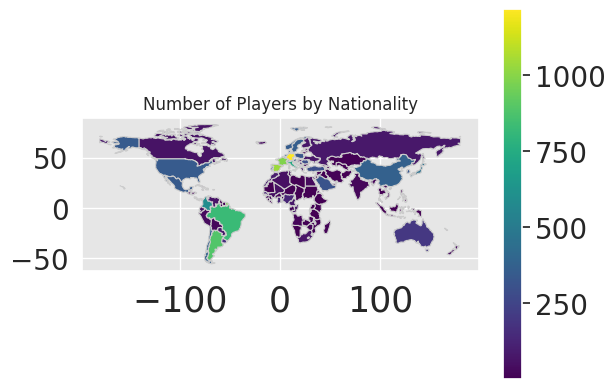

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load world map data
world_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Count the number of players from each country
nationality_counts = players_20_df['nationality'].value_counts().reset_index()
nationality_counts.columns = ['Country', 'Player Count']

# Merge world map data with nationality counts
world_map = world_map.merge(nationality_counts, how='left', left_on='name', right_on='Country')

# Plot the map
plt.figure(figsize=(30, 20))  # Adjust the figsize as needed
world_map.plot(column='Player Count', cmap='viridis', linewidth=0.8, edgecolor='0.8', legend=True)
plt.title('Number of Players by Nationality')
plt.show()


In [ ]:
import pandas as pd
import geopandas as gpd
import folium

# Load world map data
world_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Count the number of players from each country
nationality_counts = players_20_df['nationality'].value_counts().reset_index()
nationality_counts.columns = ['Country', 'Player Count']

# Merge world map data with nationality counts
world_map = world_map.merge(nationality_counts, how='left', left_on='name', right_on='Country')

# Create a folium map
m = folium.Map(location=[0, 0], zoom_start=2)

# Add choropleth layer to the map
folium.Choropleth(
    geo_data=world_map,
    name='choropleth',
    data=world_map,
    columns=['name', 'Player Count'],
    key_on='feature.properties.name',
    fill_color='YlGnBu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Number of Players by Nationality',
    highlight=True  # Enable highlighting
).add_to(m)

# Add hover tooltip
style_function = lambda x: {'fillColor': '#ffffff', 'color': '#000000', 'fillOpacity': 0.1, 'weight': 0.1}
tooltip = folium.features.GeoJsonTooltip(fields=['name', 'Player Count'], aliases=['Country', 'Player Count'])
folium.GeoJson(world_map, style_function=style_function, tooltip=tooltip).add_to(m)

# Display the map
m


<ipython-input-49-83f7801dc542>:6: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



In [ ]:
import pandas as pd
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.graph_objs as go


# Function to extract specific nationality players
def Nationality(x):
    return players_20_df[players_20_df['nationality'] == x]

# Define the Dash app
app = dash.Dash(__name__)

# Create dropdown widgets for nationality selection and position selection
nationality_dropdown = dcc.Dropdown(
    id='nationality-dropdown',
    options=[{'label': nationality, 'value': nationality} for nationality in players_20_df['nationality'].unique()],
    value=players_20_df['nationality'].unique()[0],
    clearable=False,
    searchable=False,
    placeholder='Select Nationality'
)

position_dropdown = dcc.Dropdown(
    id='position-dropdown',
    options=[{'label': position, 'value': position} for position in position_names.values()],
    value=list(position_names.values())[0],
    clearable=False,
    searchable=False,
    placeholder='Select Position'
)

# Output graph
graph_output = dcc.Graph(id='player-rating-graph')

# Define the layout
app.layout = html.Div(children=[
    html.H1('FIFA Players Dashboard', style={'textAlign': 'center'}),
    html.Div([
        html.Label('Select Nationality:', style={'marginRight': '10px'}),
        nationality_dropdown,
        html.Label('Select Position:', style={'marginRight': '10px'}),
        position_dropdown
    ], style={'textAlign': 'center', 'margin': 'auto', 'width': '80%'}),
    html.Div(id='output-container', children=graph_output)
])

# Define callback to update the graph based on dropdown selection
@app.callback(
    Output('player-rating-graph', 'figure'),
    [Input('nationality-dropdown', 'value'),
     Input('position-dropdown', 'value')]
)
def update_graph(selected_nationality, selected_position):
    nationality_data = Nationality(selected_nationality)
    position_key = [key for key, value in position_names.items() if value == selected_position][0]
    sorted_data = nationality_data.sort_values(by=position_key, ascending=False)[:10]  # Get top 10 players

    # Create a list of colors for each bar
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
              '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

    # Create bar trace for each player
    data = []
    for i, player in enumerate(sorted_data['short_name']):
        data.append(go.Bar(
            x=[sorted_data[position_key].iloc[i]],
            y=[player],
            orientation='h',
            marker=dict(color=colors[i])
        ))

    layout = go.Layout(
        title=f'Rating of {selected_position} in {selected_nationality}',
        xaxis=dict(title='Rating'),
        yaxis=dict(title='Player'),
        plot_bgcolor='white',  # Set plot background color to white
        paper_bgcolor='white',  # Set paper background color to white
        font=dict(color='darkslategray')
    )
    return {'data': data, 'layout': layout}

# Run the Dash app
if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.graph_objs as go
import seaborn as sns



# Function to extract specific nationality players
def Nationality(x):
    return players_20_df[players_20_df['nationality'] == x]

# Define the Dash app
app = dash.Dash(__name__)

# Generate a color palette based on the number of players
num_players = len(players_20_df)
color_palette = sns.color_palette("husl", num_players).as_hex()

# Create dropdown widgets for nationality selection and position selection
nationality_dropdown = dcc.Dropdown(
    id='nationality-dropdown',
    options=[{'label': nationality, 'value': nationality} for nationality in players_20_df['nationality'].unique()],
    value=players_20_df['nationality'].unique()[0],
    clearable=False,
    searchable=False,
    placeholder='Select Nationality'
)

position_dropdown = dcc.Dropdown(
    id='position-dropdown',
    options=[{'label': position, 'value': position} for position in position_names.values()],
    value=list(position_names.values())[0],
    clearable=False,
    searchable=False,
    placeholder='Select Position'
)

# Output graph
graph_output = dcc.Graph(id='player-rating-graph')

# Define the layout
app.layout = html.Div(children=[
    html.H1('FIFA Players Dashboard', style={'textAlign': 'center'}),
    html.Div([
        html.Label('Select Nationality:', style={'marginRight': '10px'}),
        nationality_dropdown,
        html.Label('Select Position:', style={'marginRight': '10px'}),
        position_dropdown
    ], style={'textAlign': 'center', 'margin': 'auto', 'width': '80%'}),
    html.Div(id='output-container', children=graph_output)
])

# Define callback to update the graph based on dropdown selection
@app.callback(
    Output('player-rating-graph', 'figure'),
    [Input('nationality-dropdown', 'value'),
     Input('position-dropdown', 'value')]
)
def update_graph(selected_nationality, selected_position):
    nationality_data = Nationality(selected_nationality)
    position_key = [key for key, value in position_names.items() if value == selected_position][0]
    sorted_data = nationality_data.sort_values(by=position_key, ascending=False)[:10]  # Get top 10 players

    # Assign a color from the color palette to each player
    player_colors = {player: color_palette[i] for i, player in enumerate(sorted_data['short_name'])}

    trace = go.Bar(
        x=sorted_data[position_key],
        y=sorted_data['short_name'],
        orientation='h',
        marker=dict(color=[player_colors[player] for player in sorted_data['short_name']])
    )
    layout = go.Layout(
        title=f'Rating of {selected_position} in {selected_nationality}',
        xaxis=dict(title='Rating'),
        yaxis=dict(title='Player'),
        plot_bgcolor='rgba(0,0,0,0)',
        paper_bgcolor='rgba(0,0,0,0)',
        font=dict(color='darkslategray')
    )
    return {'data': [trace], 'layout': layout}

# Run the Dash app
if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>

In [ ]:
pip install dash pandas plotly


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 23.4 MB/s eta 0:00:00
